# Representative Agent Models

In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from HARK.ConsumptionSaving.ConsRepAgentModel import (
    RepAgentConsumerType,
    RepAgentMarkovConsumerType,
)
from HARK.utilities import plot_funcs

This module contains models for solving representative agent (RA) macroeconomic models. This stands in contrast to all other model modules in HARK, which (unsurprisingly) take a heterogeneous agents approach.
In RA models, all attributes are either time invariant or exist on a short cycle. Also, models must be infinite horizon.

## Representative Agent's Problem

Each period, the representative agent makes a decision about how much of his resources $m_t$ he should consume $c_t$ and how much should retain as assets $a_t$. He gets a flow of utility from consumption, with CRRA preferences (with coefficient $\rho$). Retained assets are used to finance productive capital $k_{t+1}$ in the next period. Output is produced according to a Cobb-Douglas production function using capital and labor $\ell_{t+1}$, with a capital share of $\alpha$; a fraction $\delta$ of capital depreciates immediately after production.

The agent's labor productivity is subject to permanent and transitory shocks, $\psi_t$ and $\theta_t$ respectively. The representative agent stands in for a continuum of identical households, so markets are assumed competitive: the factor returns to capital and income are the (net) marginal product of these inputs.

In the notation below, all lowercase state and control variables ($m_t$, $c_t$, etc) are normalized by the permanent labor productivity of the agent. The level of these variables at any time $t$ can be recovered by multiplying by permanent labor productivity $p_t$ (itself usually normalized to 1 at model start).

The agent's problem can be written in Bellman form as:

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t} U(c_t) + \beta \mathbb{E} [(\Gamma_{t+1}\psi_{t+1})^{1-\rho} v_{t+1}(m_{t+1})], \\
a_t &=& m_t - c_t, \\
\psi_{t+1} &\sim& F_{\psi t+1}, \qquad  \mathbb{E} [F_{\psi t}] = 1,\\
\theta_{t+1} &\sim& F_{\theta t+1}, \\
k_{t+1} &=& a_t/(\Gamma_{t+1}\psi_{t+1}), \\
R_{t+1} &=& 1 - \delta + \alpha (k_{t+1}/\theta_{t+1})^{(\alpha - 1)}, \\
w_{t+1} &=& (1-\alpha) (k_{t+1}/\theta_{t+1})^\alpha, \\
m_{t+1} &=& R_{t+1} k_{t+1} + w_{t+1}\theta_{t+1}, \\
U(c) &=& \frac{c^{1-\rho}}{1-\rho}
\end{eqnarray*}

The one period problem for this model is solved by the function `solveConsRepAgent`.

In [2]:
# Make a quick example dictionary
RA_params = {
    "DeprRte": 0.05,
    "CapShare": 0.36,
    "UnempPrb": 0.0,
    "LivPrb": [1.0],
}

Solving a representative agent problem took 0.08506441116333008 seconds.


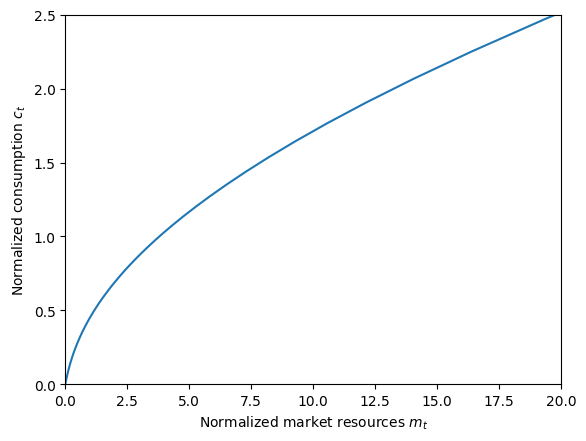

In [3]:
# Make and solve a rep agent model
RAexample = RepAgentConsumerType(**RA_params)
t_start = time()
RAexample.solve()
t_end = time()
print(
    "Solving a representative agent problem took " + str(t_end - t_start) + " seconds.",
)

plt.ylim(0.0, 2.5)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plot_funcs(RAexample.solution[0].cFunc, 0, 20)

In [4]:
# Simulate the representative agent model
RAexample.T_sim = 2000
RAexample.AgentCount = 1
RAexample.track_vars = ["cNrm", "mNrm", "Rfree", "wRte"]
RAexample.initialize_sim()
t_start = time()
RAexample.simulate()
t_end = time()
print(
    "Simulating a representative agent for "
    + str(RAexample.T_sim)
    + " periods took "
    + str(t_end - t_start)
    + " seconds.",
)

Simulating a representative agent for 2000 periods took 2.641847848892212 seconds.


Solving a two state representative agent problem took 0.2411363124847412 seconds.


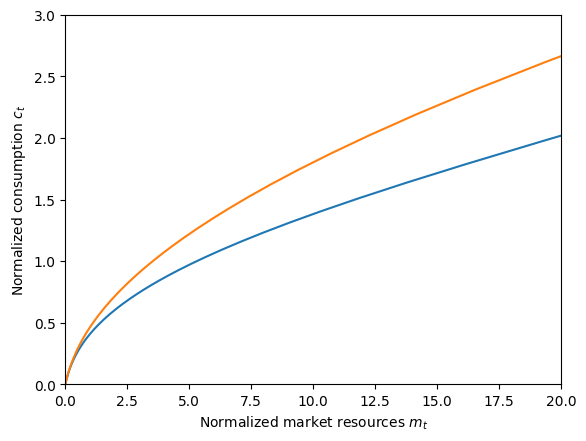

In [5]:
# Make and solve a Markov representative agent
RA_markov_params = {
    "DeprRte": 0.05,
    "CapShare": 0.36,
    "UnempPrb": 0.0,
    "LivPrb": [1.0],
    "PermGroFac": [[0.97, 1.03]],
    "MrkvArray": np.array([[0.99, 0.01], [0.01, 0.99]]),
    "Mrkv": 0,
}
RAmarkovExample = RepAgentMarkovConsumerType(**RA_markov_params)
RAmarkovExample.IncShkDstn = [2 * [RAmarkovExample.IncShkDstn[0]]]
t_start = time()
RAmarkovExample.solve()
t_end = time()
print(
    "Solving a two state representative agent problem took "
    + str(t_end - t_start)
    + " seconds.",
)

plt.ylim(0.0, 3.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plot_funcs(RAmarkovExample.solution[0].cFunc, 0, 20)

In [6]:
# Simulate the two state representative agent model
RAmarkovExample.T_sim = 2000
RAmarkovExample.AgentCount = 1
RAmarkovExample.track_vars = ["cNrm", "mNrm", "Rfree", "wRte", "Mrkv"]
RAmarkovExample.initialize_sim()
t_start = time()
RAmarkovExample.simulate()
t_end = time()
print(
    "Simulating a two state representative agent for "
    + str(RAexample.T_sim)
    + " periods took "
    + str(t_end - t_start)
    + " seconds.",
)

Simulating a two state representative agent for 2000 periods took 2.6849746704101562 seconds.
